In [this dataset](https://www.kaggle.com/altruistdelhite04/loan-prediction-problem-dataset), we need to predict whether or not to approve a loan based on the past information of the person. This is a classification problem and we will use machine learning, Decision Tree Classifier model, to make the prediction.

# Import Libraries
First, we import necessary libraries, such as:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

# Import The Data

In [2]:
train = pd.read_csv('/kaggle/input/loan-prediction-problem-dataset/train_u6lujuX_CVtuZ9i.csv')

# Read The Data
First, let's see the first 5 rows to familiarize ourself with the data.

In [3]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


To get more details, we are going to print ```info()``` and ```describe()``` to make a quick observation and gain some insight from it.

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
train.describe(include='all')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,601,611,599,614,582,614.000000,614.000000,592.000000,600.00000,564.000000,614,614
unique,614,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP002239,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,489,398,345,480,500,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,146.412162,342.00000,0.842199,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,85.587325,65.12041,0.364878,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.00000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.000000,360.00000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.00000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,168.000000,360.00000,1.000000,NaN,NaN


In [6]:
train.isnull().sum().sort_values(ascending=False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Loan_Status           0
Property_Area         0
CoapplicantIncome     0
ApplicantIncome       0
Education             0
Loan_ID               0
dtype: int64

### Quick observation on the combined data
- Total loaner: 614
- Feature that can be dropped from training immediately:
    - **Loan_ID**
- The **Loan_Status** feature, as target array, can be used as a reference to fill missing values, so we will not drop it immediately.
- The **Dependents** feature is given in categorical but contain numerical variables. Therefore, we have to converted it to numerical variables.
- The **Credit_History** feature is given in numerical, with 1 means 'Yes' and 0 means 'No'. We will converted it to categorical feature.
- Features that have missing values:
    - **Credit_History:**        50
    - **Self_Employed:**         32
    - **LoanAmount:**            22
    - **Dependents:**            15
    - **Gender:**                14
    - **Loan_Amount_Term:**      13
    - **Married:**                3

### Plot The Distribution of Numerical Features

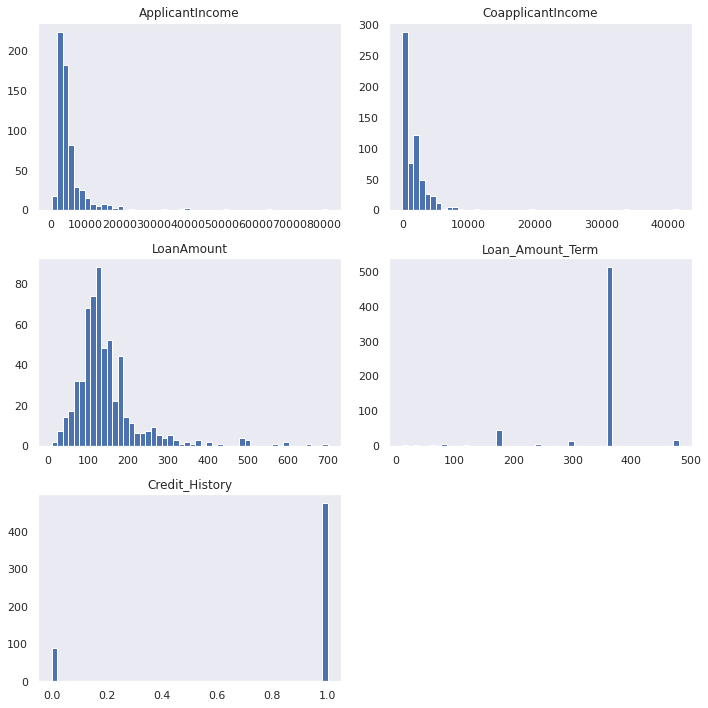

In [7]:
#plot the distribution of numerical features
train.hist(bins=50,figsize=(10,10),grid=False)
plt.tight_layout()
plt.show()

We can see we got right-skewed and left-skewed. We will fix this in the next step by taking the log of the values to make it normally distributed. By making it normally distributed, we can improve our model.

# Exploratory Data Analysis

### Drop Features

In [8]:
#drop feature
train.drop(['Loan_ID'], axis=1, inplace=True)

### Change to Numerical

In [9]:
#check unique values
train['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [10]:
#replace '3+' with '3'
train['Dependents'].replace('3+', '3', inplace=True)

#change to numerical
train['Dependents'] = train['Dependents'].astype('float')

### Changet to Categorical

In [11]:
#check unique values
train['Credit_History'].unique()

array([ 1.,  0., nan])

In [12]:
#replace 1.0 with 'Y' and 0.0 with 'N'
train['Credit_History'].replace({1.: 'Y', 0.: 'N'}, inplace=True)

#change to categorical
train['Credit_History'] = train['Credit_History'].astype('object')

### Fill Missing Value: 

- Fill with mode()

In [13]:
#fill missing values with mode 
features_fill_with_mode = ['Self_Employed',
                           'Dependents',
                           'Gender',
                           'Loan_Amount_Term']

for feature in features_fill_with_mode:
    train[feature].fillna(train[feature].mode()[0], inplace=True)

- Fill with mean()

In [14]:
#fill missing values with mean
train['LoanAmount'].fillna(train['LoanAmount'].mean(), inplace=True)

- Credit_History Feature

Before we fill missing values in Credit_History feature, we will take a deeper look by plotting it.

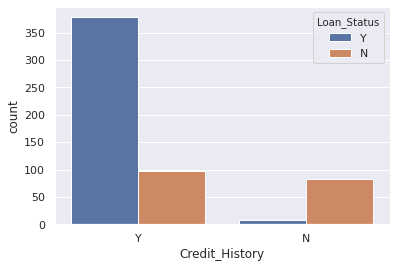

In [15]:
sns.countplot(x='Credit_History', hue='Loan_Status', data=train);

From the plot above, we can see that Credit_History is important feature. Most people with 0 credit history didn't get a loan. But, most people who got credit history have so much better chance to get a loan.

Since Credit_History = 'Y' is the value that appears most often in both Loan_Status, so we will fill missing values with 'Y' 

In [16]:
train['Credit_History'].fillna('Y', inplace=True)

- Married Feature

For start, we will check if the missing values in the Married feature have Dependets or CoapplicantIncome more than 0, and fill it with 'Yes' if true and 'No' if otherwise.

In [17]:
#check Dependents and CoapplicantIncome
mask = ((train['Dependents'] > 0) | (train['CoapplicantIncome'] > 0)) \
        & \
        train['Married'].isnull()

train[mask][['Married','Dependents','CoapplicantIncome']]

,Married,Dependents,CoapplicantIncome
104,NaN,0.0,754.0


In [18]:
#Fill missing values
train.loc[mask,'Married'] = 'Yes'
train['Married'].fillna('No', inplace=True)

### Target Array
let's look at the target distribution

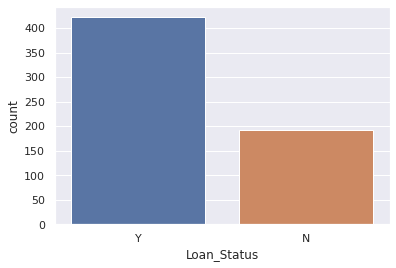

In [19]:
sns.countplot(train['Loan_Status']);

From the distribution above, we can consider that the data is not imbalanced. So, we can straight to the next step: change it to numerical feature.

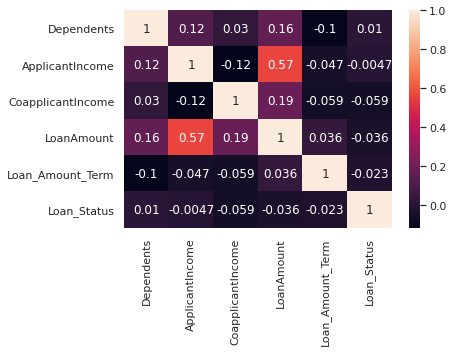

In [20]:
#transform to numerical
train['Loan_Status'] = train['Loan_Status'].apply(lambda x: 1 if x=='Y' else 0)

#correlation
sns.heatmap(train.corr(),annot=True);

In [21]:
#copy 
target_array = train['Loan_Status'].copy()

#drop
train.drop(['Loan_Status'], axis=1, inplace=True)

### Creating new features

In [22]:
#create total income feature
train['Total_Income'] = train['ApplicantIncome'] + train['CoapplicantIncome']

#create average loan amount feature (per day)
train['Loan_Amount_Avg'] = train['LoanAmount'] / train['Loan_Amount_Term']

#drop
train.drop(['ApplicantIncome','CoapplicantIncome'], axis=1, inplace=True)

### Epilogue

- Chech for any missing values

In [23]:
#missing values
print(train.isnull().any().sum())

0


- Normality Test

In [24]:
#define a normality test function
def normalityTest(data, alpha=0.05):
    """data (array)   : The array containing the sample to be tested.
	   alpha (float)  : Significance level.
	   return True if data is normal distributed"""
    
    from scipy import stats
    
    statistic, p_value = stats.normaltest(data)
    
    #null hypothesis: array comes from a normal distribution
    if p_value < alpha:  
        #The null hypothesis can be rejected
        is_normal_dist = False
    else:
        #The null hypothesis cannot be rejected
        is_normal_dist = True
    
    return is_normal_dist

In [25]:
#check normality of all numericaal features and transform it if not normal distributed
for feature in train.columns:
    if (train[feature].dtype != 'object'):
        if normalityTest(train[feature]) == False:
            train[feature] = np.log1p(train[feature])

- Creating Dummies

In [26]:
#create dummies
train = pd.get_dummies(train, drop_first=True)

print(train.shape)
display(train.head())

(614, 12)


,Dependents,LoanAmount,Loan_Amount_Term,Total_Income,Loan_Amount_Avg,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Credit_History_Y,Property_Area_Semiurban,Property_Area_Urban
0,0.000000,4.993232,5.888878,8.674197,0.341247,1,0,0,0,1,0,1
1,0.693147,4.859812,5.888878,8.714732,0.304211,1,1,0,0,1,0,0
2,0.000000,4.204693,5.888878,8.006701,0.168335,1,1,0,1,1,0,1
3,0.000000,4.795791,5.888878,8.505525,0.287682,1,1,1,0,1,0,1
4,0.000000,4.955827,5.888878,8.699681,0.330502,1,0,0,0,1,0,1


- Creating features matrix (X) and target array (y)

In [27]:
X = train
y = target_array

# Creating a Model
We begin by splitting data into two subsets: for training data and for testing data.

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state = 0)

Model training : Decision Tree Classifier

In [29]:
from sklearn.tree import DecisionTreeClassifier

#create a model
model = DecisionTreeClassifier()

In [30]:
#search grid for optimal parameters
from sklearn.model_selection import GridSearchCV

param_grid = {'random_state' : [0,42],
              'max_depth': [1,10,100]}

grid = GridSearchCV(model, param_grid, cv=5)

grid.fit(X_train, y_train)

print(grid.best_params_)
print(grid.best_score_)

{'max_depth': 1, 'random_state': 0}
0.8028504260946224


In [31]:
from sklearn.metrics import classification_report

#use the best model
model = grid.best_estimator_

#make a prediction
y_predict = model.predict(X_test)

#calculate classification report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.92      0.41      0.57        58
           1       0.81      0.99      0.89       145

    accuracy                           0.82       203
   macro avg       0.87      0.70      0.73       203
weighted avg       0.84      0.82      0.80       203

